<a href="https://colab.research.google.com/github/DininduChamikara/Agglomerative-Hierarchical-Clustering/blob/main/Agglomerative/IM_2018_057_Agglomerative_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agglomerative Hierarchical Clustering**

We will first import the required libraries.
To create a data set we need to import **pandas** library.
We need to import **matplot** library to show data in a diagram (here we use scatter plot diagram)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data and and look at the rows

In [ ]:
data = pd.read_csv('std_data.csv')
data.head(20)

,std_id,height,weight
0,1,1.70,70
1,2,1.50,45
2,3,1.51,50
3,4,1.69,68
4,5,1.60,62
5,6,1.53,55
6,7,1.55,59
7,8,1.72,80
8,9,1.49,44
9,10,1.68,67


So, let’s first normalize the data and bring all the variables to the same scale

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head(20)

,std_id,height,weight
0,0.014280,0.024276,0.999603
1,0.044376,0.033282,0.998460
2,0.059865,0.030132,0.997752
3,0.058704,0.024802,0.997967
4,0.080358,0.025714,0.996434
5,0.108406,0.027644,0.993722
6,0.117778,0.026079,0.992697
7,0.099481,0.021388,0.994810
8,0.200286,0.033158,0.979176
9,0.147573,0.024792,0.988740


We can assign student ids to each points. To change the size of annotaton we can use **size** attribute.

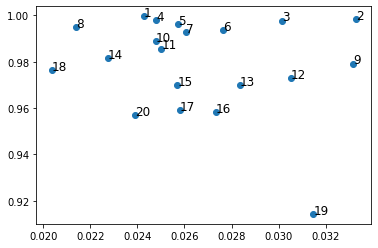

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data_scaled.height, data_scaled.weight)

for index, value in enumerate(data.std_id):
  plt.annotate(value, (data_scaled.height[index], data_scaled.weight[index]), size=12)

To show this data into Dendrogram we need to use **scipy** library.

('ward' - Perform Ward's linkage on a condensed distance matrix.)

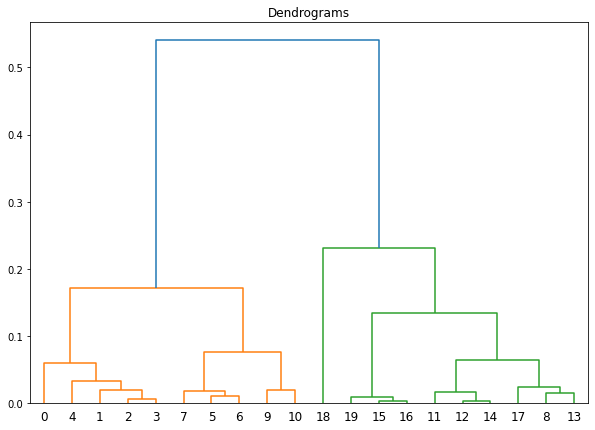

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

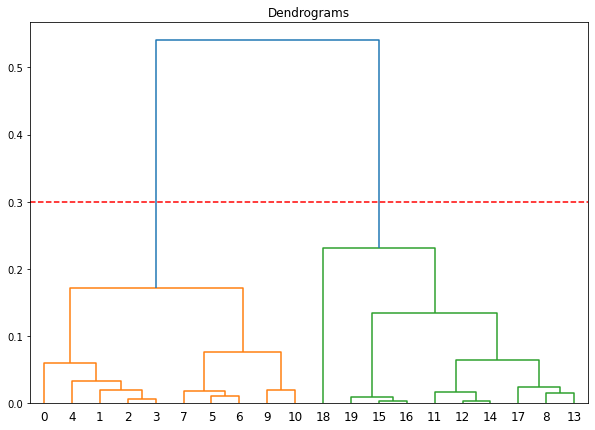

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.3, color='r', linestyle='--')

To create the model object we need to use **sklearn** library.
Here we declare n_cluster as 2 because we mainly consider about 2 groups as 'male' and 'female'.

**affinity** - to assign a distance finding method

**pred** - prdeicting values

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
pred = cluster.fit_predict(data_scaled)

We can see predeicted values by calling pred.

In [ ]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Creating a new column called 'cluster' to identify the students in the 2 different clusters

Then we can move data into two different groups according to the value of 'cluster'

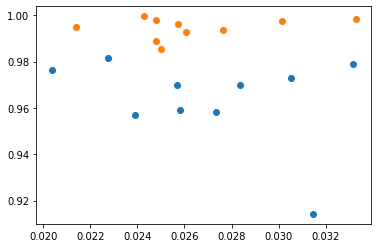

In [ ]:
cluster1 = data_scaled[data['cluster']==0]
cluster2 = data_scaled[data['cluster']==1]

plt.scatter(cluster1.height, cluster1.weight)
plt.scatter(cluster2.height, cluster2.weight)

According to this the orage dots more likely to show the fmales and blue dots more likely show the males.